# Spoken language processing

### Import audio file with python

In [5]:
import wave
import soundfile as sf 
import io
import numpy as np
from matplotlib import pyplot as plt

filename='/Users/othrif/Downloads/froms3/test1.wav'
#filename='/Users/othrif/Downloads/josh_converted.wav'

import IPython.display as ipd
ipd.Audio(filename)

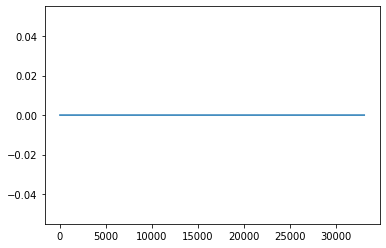

In [8]:
# common imports
import IPython.display as ipd
import librosa
import warnings
warnings.filterwarnings('ignore')

filename='/Users/othrif/Downloads/josh_converted.wav'
ipd.display(ipd.Audio(filename))
sound,sr = librosa.load(filename)
plt.plot(sound)

In [32]:
import IPython.display as ipd
ipd.Audio(test, 16000)

OSError: [Errno 9] Bad file descriptor

In [8]:
import wave

# Create audio file wave object
good_morning = wave.open('./good_morning.wav', 'r')
good_afternoon = wave.open('./good_afternoon.wav', 'r')

# Read all frames from wave object 
signal_gm = good_morning.readframes(-1)
signal_ga = good_afternoon.readframes(-1)

# View first 10
print(signal_gm[:2])

b'\xfd\xff'


### Convert byte form to integer

In [9]:
import numpy as np
# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')
soundwave_ga = np.frombuffer(signal_ga, dtype='int16')
print(soundwave_gm[:10])

[ -3  -5  -8  -8  -9 -13  -8 -10  -9 -11]


### Timestamps

In [12]:
# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()
framerate_ga = good_afternoon.getframerate()

# Find the sound wave timestamps
time_gm = np.linspace(start=0, stop=len(soundwave_gm)/framerate_gm, num=len(soundwave_gm))
time_ga = np.linspace(start=0, stop=len(soundwave_ga)/framerate_ga, num=len(soundwave_ga))

# Print the first 10 timestamps
print(time_gm[:10])

[0.00000000e+00 2.08334167e-05 4.16668333e-05 6.25002500e-05
 8.33336667e-05 1.04167083e-04 1.25000500e-04 1.45833917e-04
 1.66667333e-04 1.87500750e-04]


### Visualize sound wave

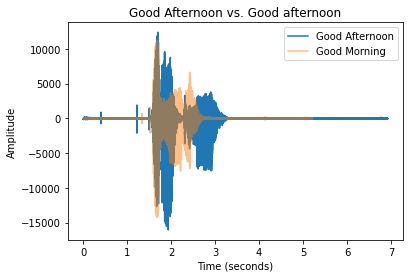

In [15]:
from matplotlib import pyplot as plt

# Setup the title and axis titles
plt.title('Good Afternoon vs. Good afternoon')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_ga, soundwave_ga, label='Good Afternoon')

# Add the Good Morning data to the plot
plt.plot(time_gm, soundwave_gm, label='Good Morning', alpha=0.5)

plt.legend()
plt.show()

### SpeechRecognition library

In [30]:
# Importing the speech_recognition library
import speech_recognition as sr

# Create an instance of the Recognizer class
recognizer = sr.Recognizer()

# Set the energy threshold
recognizer.energy_threshold = 300

# Read audio 
clean_support_call = sr.AudioFile('clean_support_call.wav')

with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source, duration=None, offset=None)

# Transcribe the support call audio
text = recognizer.recognize_google(audio_data=clean_support_call_audio, language='en-US')

print(text)

hello I'd like to get some help setting up my account please


#### With noise

In [34]:
noisy_support_call = sr.AudioFile('noisy_support_call.wav')

recognizer = sr.Recognizer()

# Record the audio from the noisy support call
with noisy_support_call as source:
    # Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    noisy_support_call_audio = recognizer.record(noisy_support_call)
 
# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio,
                                   language="en-US",
                                   show_all=False)

print(text)

hello I'd like to get to help setting up my calendar


# PyDub

## Read audio

In [14]:
# Import AudioSegment and play
from pydub import AudioSegment
from pydub.playback import play

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file='good_morning.wav', 
                                  format="wav")

# Play the audio file
play(wav_file)

## Change properties

In [31]:
# Audio parameters
print(f'Frame rate: {wav_file.frame_rate}')
print(f'Number of channels: {wav_file.channels}')
print(f'Sample width: {wav_file.sample_width} * 8 bits')
print(f'Max amplitude: {wav_file.max}')
print(f'Length: {len(wav_file)} ms')
print(f'Length: {wav_file.duration_seconds} s')

Frame rate: 48000
Number of channels: 2
Sample width: 2 * 8 bits
Max amplitude: 14257
Length: 2604 ms
Length: 2.604 s


In [32]:
# Create a new wav file with adjusted frame rate
wav_file_16k = wav_file.set_frame_rate(16000)
print(f'Frame rate: {wav_file_16k.frame_rate}')
# Set number of channels to 1
wav_file_1_ch = wav_file.set_channels(1)
print(f'Number of channels: {wav_file_1_ch.channels}')
# Set sample_width to 1
wav_file_sw_1 = wav_file.set_sample_width(1)
print(f'New sample width: {wav_file_sw_1.sample_width}')

Frame rate: 16000
Number of channels: 1
New sample width: 1


## Manipulating audio files

In [36]:
from pydub import AudioSegment
from pydub.playback import play

# Import audio file
volume_adjusted = AudioSegment.from_file('clean_support_call.wav')

# Baseline
play(volume_adjusted)
# Lower the volume by 60 dB
quiet_volume_adjusted = volume_adjusted - 60
play(quiet_volume_adjusted)
# Increase the volume by 15 dB
louder_volume_adjusted = volume_adjusted + 15
play(louder_volume_adjusted)

### Normalizing an audio file
It happens when you have different loudness levels in the audio

In [2]:
# Import AudioSegment and normalize
from pydub import AudioSegment
from pydub.effects import normalize
from pydub.playback import play

# Import target audio file
loud_then_quiet = AudioSegment.from_file('loud_then_quiet.wav')
play(loud_then_quiet)

# Normalize target audio file
normalized_loud_then_quiet = normalize(loud_then_quiet)
play(normalized_loud_then_quiet)

### Slicing and adding audio files

In [5]:
from pydub import AudioSegment
from pydub.playback import play

# Import part 1 and part 2 audio files
part_1 = AudioSegment.from_file('part_1.wav', format='wav')
part_2 = AudioSegment.from_file('part_2.wav')

# Remove the first four seconds of part 1
part_1_removed = part_1[4000:]

# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2

### Splitting stereo audio to mono

In [8]:
# Import AudioSegment
from pydub import AudioSegment

# Import stereo audio file and check channels
stereo_phone_call = AudioSegment.from_file('stereo_phone_call.wav')
print(f'Stereo number channels: {stereo_phone_call.channels}')

# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f'Split number channels: {channels[0].channels}, {channels[1].channels}')

# Save new channels separately
phone_call_channel_1 = channels[0]
phone_call_channel_2 = channels[1]

Stereo number channels: 2
Split number channels: 1, 1


### Convert and save audio

In [9]:
normalized_loud_then_quiet.export(out_f='normalized_loud_then_quiet.wav', format='wav')

<_io.BufferedRandom name='normalized_loud_then_quiet.wav'>

### Audio processing workflow

In [10]:
def make_wav(old_folder_path, new_folder_path):
    
    for file in os.scandir(old_folder_path):
        if file.path.endswith(".mp3") or file.path.endswith(".flac"):
            
            file_with_static = AudioSegment.from_file(file)

            # Cut the 3-seconds of static off
            file_without_static = file_with_static[3000:]

            # Increase the volume by 10dB
            louder_file_without_static = file_without_static + 10
    
            # Create the .wav filename for export
            wav_filename = new_folder_path + os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
    
            # Export the louder file without static as .wav
            louder_file_without_static.export(wav_filename, format='wav')
            print(f"Creating {wav_filename}...")

# Full project with speech recognition and NLP

In [3]:
## Standard imports
from pydub import AudioSegment
import speech_recognition as sr
from pydub.playback import play
from pydub.effects import normalize


## Helper Functions

def convert_to_wav(filename):
  """Takes an audio file of non .wav format and converts to .wav"""
  # Import audio file
  audio = AudioSegment.from_file(filename)
  
  # Create new filename
  new_filename = filename.split(".")[0] + '.wav'
  
  # Export file as .wav
  audio.export(new_filename, format='wav')
  print(f'Converting {filename} to {new_filename}...')
 
def show_pydub_stats(filename):
  """Returns different audio attributes related to an audio file."""
  # Create AudioSegment instance
  audio_segment = AudioSegment.from_file(filename)
  
  # Print audio attributes and return AudioSegment instance
  print(f'Channels: {audio_segment.channels}')
  print(f'Sample width: {audio_segment.sample_width}')
  print(f'Frame rate (sample rate): {audio_segment.frame_rate}')
  print(f'Frame width: {audio_segment.frame_width}')
  print(f'Length (ms): {len(audio_segment)}')
  return audio_segment

def transcribe_audio(filename):
  """Takes a .wav format audio file and transcribes it to text."""
  # Setup a recognizer instance
  recognizer = sr.Recognizer()
  
  # Import the audio file and convert to audio data
  audio_file = sr.AudioFile(filename)
  with audio_file as source:
    audio_data = recognizer.record(source)
  
  # Return the transcribed text
  return recognizer.recognize_google(audio_data)

# Test the functions
convert_to_wav('good_morning.wav')
call_1_audio_segment = show_pydub_stats('good_morning.wav')
print(transcribe_audio('good_morning.wav'))

Converting good_morning.wav to good_morning.wav...
Channels: 2
Sample width: 2
Frame rate (sample rate): 48000
Frame width: 4
Length (ms): 2604
good morning


### Sentiment analysis

In [4]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/othrif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/othrif/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Let's try it on one of our phone calls
call_2_text = transcribe_audio('call_2.wav')

# Display text and sentiment polarity scores
print(call_2_text)
print(sid.polarity_scores(call_2_text))

hello my name is Daniel thank you for calling Acme Studios how can I best help you from you guys and extremely happy with it I'll just go to East not an issue but I'm just going to learn a little bit more about the message prank I had but I thought you on the corner of Edward and Elizabeth according to Google according to the maps but some would you be able to help me in some way because I think I actually walked straight past your shop yeah sure thing well thank you Sally that's good to hear you're enjoying it let me let me find out where the nearest stories for you
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.9858}


In [6]:
call_2_channel_2_paid_api_text="Hello and welcome to acme studios. My name's Daniel. How can I best help you? Hi Diane. This is paid on this call up to see the status of my, I'm proctor mortars at three weeks ago, and then service is terrible. Okay, Peter, sorry to hear about that. Hey, Peter, before we go on, do you mind just, uh, is there something going on with your microphone? I can't quite hear you. Is this any better? Yeah, that's much better. And sorry, what was, what was it that you said when you first first started speaking?  So I ordered a product from you guys three weeks ago and, uh, it's, it's currently on July 1st and I haven't received a provocative, again, three weeks to a full four weeks down line. This service is terrible. Okay. Well, what's your order id? I'll, uh, I'll start looking into that for you. Six, nine, eight, seven five. Okay. Thank you."

In [7]:
from nltk import sent_tokenize
# Split channel 2 paid text into sentences and score each
for sentence in sent_tokenize(call_2_channel_2_paid_api_text):
    print(sentence)
    print(sid.polarity_scores(sentence))

Hello and welcome to acme studios.
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}
My name's Daniel.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
How can I best help you?
{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.7845}
Hi Diane.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
This is paid on this call up to see the status of my, I'm proctor mortars at three weeks ago, and then service is terrible.
{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'compound': -0.4767}
Okay, Peter, sorry to hear about that.
{'neg': 0.159, 'neu': 0.61, 'pos': 0.232, 'compound': 0.1531}
Hey, Peter, before we go on, do you mind just, uh, is there something going on with your microphone?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I can't quite hear you.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Is this any better?
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
Yeah, that's much better.
{'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'compound': 0.

### Entity recognition on transcribed text

In [28]:
import spacy
import en_core_web_sm


# Create a spaCy language model instance
nlp = en_core_web_sm.load()

call_2_text = call_2_text+' smartphone'
print(call_2_text)
# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_2_text)

# Check the type of doc
print(type(doc))

smartphone smartphonehello my name is Daniel thank you for calling Acme Studios how can I best help you from you guys and extremely happy with it I'll just go to East not an issue but I'm just going to learn a little bit more about the message prank I had but I thought you on the corner of Edward and Elizabeth according to Google according to the maps but some would you be able to help me in some way because I think I actually walked straight past your shop yeah sure thing well thank you Sally that's good to hear you're enjoying it let me let me find out where the nearest stories for you smartphone smartphone smartphone smartphone
<class 'spacy.tokens.doc.Doc'>


In [29]:
# Show tokens in doc
for token in doc:
    print(token.text, token.idx)

smartphone 0
smartphonehello 11
my 27
name 30
is 35
Daniel 38
thank 45
you 51
for 55
calling 59
Acme 67
Studios 72
how 80
can 84
I 88
best 90
help 95
you 100
from 104
you 109
guys 113
and 118
extremely 122
happy 132
with 138
it 143
I 146
'll 147
just 151
go 156
to 159
East 162
not 167
an 171
issue 174
but 180
I 184
'm 185
just 188
going 193
to 199
learn 202
a 208
little 210
bit 217
more 221
about 226
the 232
message 236
prank 244
I 250
had 252
but 256
I 260
thought 262
you 270
on 274
the 277
corner 281
of 288
Edward 291
and 298
Elizabeth 302
according 312
to 322
Google 325
according 332
to 342
the 345
maps 349
but 354
some 358
would 363
you 369
be 373
able 376
to 381
help 384
me 389
in 392
some 395
way 400
because 404
I 412
think 414
I 420
actually 422
walked 431
straight 438
past 447
your 452
shop 457
yeah 462
sure 467
thing 472
well 478
thank 483
you 489
Sally 493
that 499
's 503
good 506
to 511
hear 514
you 519
're 522
enjoying 526
it 535
let 538
me 542
let 545
me 549
find 552
out 5

In [30]:
# Show sentences in doc
for sentence in doc.sents:
    print(sentence)

smartphone smartphonehello
my name is
Daniel thank you for calling Acme Studios
how can I best help you from you guys and extremely happy with it
I'll just go to East
not an issue
but I'm just going to learn a little bit more about the message prank
I had
but I thought you on the corner of Edward and Elizabeth according to Google
according to the maps
but some would you be able to help me in some way because I think I actually walked straight past your shop
yeah
sure thing
well thank you Sally
that's good to hear you're enjoying
it let me let me find out where the nearest stories for you smartphone smartphone smartphone smartphone


In [31]:
# Show named entities and their labels
for entity in doc.ents:
    print(entity.text, entity.label_)

Daniel PERSON
Acme Studios ORG
East LOC
Edward PERSON
Elizabeth PERSON
Google ORG
Sally PERSON


In [32]:
print(nlp.pipeline)
# ner: name entity ruler

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x11f547be0>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x12cf14be0>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x12e02b280>)]


In [33]:
# Custom named entity 

# Import EntityRuler class
from spacy.pipeline import EntityRuler

# Create EntityRuler instance
ruler = EntityRuler(nlp)

# Define pattern for new entity
ruler.add_patterns([{"label": "PRODUCT", "pattern": "smartphone"}])

# Update existing pipeline
nlp.add_pipe(ruler, before="ner")

In [34]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x11f547be0>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x12cf14be0>),
 ('entity_ruler', <spacy.pipeline.entityruler.EntityRuler at 0x11e74de50>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x12e02b280>)]

In [35]:
doc = nlp(call_2_text)
# Test new entity
for entity in doc.ents:
  print(entity.text, entity.label_)

smartphone PRODUCT
Daniel PERSON
Acme Studios ORG
East LOC
Edward PERSON
Elizabeth PERSON
Google ORG
Sally PERSON
smartphone PRODUCT
smartphone PRODUCT
smartphone PRODUCT
smartphone PRODUCT


# Classifying transcribed speech with Sklearn

In [40]:
# preparing audio 

# Convert post purchase
#for file in post_purchase:
#    print(f"Converting {file} to .wav...")
    #convert_to_wav(file)

# Convert pre purchase
#for file in pre_purchase:
#    print(f"Converting {file} to .wav...")
    #convert_to_wav(file)
    
# Transcribe phone call excerts
def create_text_list(folder):
  # Create empty list
  text_list = []
  
  # Go through each file
  for file in folder:
    # Make sure the file is .wav
    if file.endswith(".wav"):
      print(f"Transcribing file: {file}...")
      
      # Transcribe audio and append text to list
      text_list.append(transcribe_audio(file))   
  return text_list

# Transcribe post and pre purchase text
#post_purchase_text = create_text_list(post_purchase_wav_files)
#pre_purchase_text = create_text_list(pre_purchase_wav_files)


# Organize transcribed phone call into pandas
import pandas as pd

# Make dataframes with the text
#post_purchase_df = pd.DataFrame({"label": "post_purchase", "text": post_purchase_text})
#pre_purchase_df = pd.DataFrame({"label": "pre_purchase", "text": pre_purchase_text})

# Combine DataFrames
#df = pd.concat([post_purchase_df, pre_purchase_df])
df = pd.read_csv('./customer_call_transcriptions.csv')
# Print the combined DataFrame
print(df.head())

           label                                               text
0   pre_purchase  how's it going Arthur I just placed an order w...
1  post_purchase  yeah hello I'm just wondering if I can speak t...
2  post_purchase  hey I receive my order but it's the wrong size...
3   pre_purchase  hi David I just placed an order online and I w...
4  post_purchase  hey I bought something from your website the o...


In [49]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# Create a spoken language text classifier
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.3)

# Create text classifier pipeline
text_classifier = Pipeline([  ("vectorizer", CountVectorizer()),  ("tfidf", TfidfTransformer()),  ("classifier", MultinomialNB())])

# Fit the classifier pipeline on the training data
text_classifier.fit(X_train, y_train)

# Make predictions and compare them to test labels
predictions = text_classifier.predict(X_test)
accuracy = 100 * np.mean(predictions == y_test)
print(f"The model is {accuracy:.2f}% accurate.")


The model is 96.77% accurate.
